## Loading Dependencies

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv("/kaggle/input/walmart-10k-sales-datasets/Walmart.csv")
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


## Data Cleaning and Preprocessing

In [120]:
df.shape

(10051, 11)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [122]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

### Issues :-
- Unit Price, Quantity => Missing Values (31 each)
- Unit Price => Object (not Int/Float)
- Date, Time => Object (not DateTime)

In [123]:
# There are no Duplicates
df[df.duplicated()]

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
10000,9950,WALM038,Sugar Land,Fashion accessories,$17,1.0,27/11/23,9:15:00,Cash,3.0,0.48
10001,9951,WALM082,Weslaco,Home and lifestyle,$58,2.0,08/07/20,12:39:00,Cash,6.0,0.33
10002,9952,WALM035,San Angelo,Fashion accessories,$76,3.0,02/10/21,16:34:00,Cash,6.0,0.48
10003,9953,WALM084,Schertz,Home and lifestyle,$68,3.0,13/06/21,10:52:00,Cash,5.0,0.33
10004,9954,WALM046,Temple,Fashion accessories,$40,1.0,22/08/20,14:38:00,Cash,6.0,0.48
10005,9955,WALM054,Sherman,Home and lifestyle,$61,3.0,05/12/21,7:46:00,Cash,3.0,0.21
10006,9956,WALM003,San Antonio,Fashion accessories,$17,3.0,29/10/20,7:13:00,Cash,4.0,0.48
10007,9957,WALM029,Round Rock,Home and lifestyle,$53,1.0,20/06/23,13:41:00,Cash,4.0,0.48
10008,9958,WALM084,Schertz,Fashion accessories,$35,2.0,10/04/22,14:58:00,Cash,7.0,0.33
10009,9959,WALM065,Texas City,Home and lifestyle,$36,1.0,11/03/22,10:26:00,Cash,4.0,0.33


## Handling Data Issues

In [124]:
# 1. Handle missing values
df["unit_price"] = df["unit_price"].str.replace("$", "").astype(float)  # Remove "$" and convert to float

In [125]:
# 2. Convert date and time to datetime
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%y")
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.time

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      10051 non-null  int64         
 1   Branch          10051 non-null  object        
 2   City            10051 non-null  object        
 3   category        10051 non-null  object        
 4   unit_price      10020 non-null  float64       
 5   quantity        10020 non-null  float64       
 6   date            10051 non-null  datetime64[ns]
 7   time            10051 non-null  object        
 8   payment_method  10051 non-null  object        
 9   rating          10051 non-null  float64       
 10  profit_margin   10051 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 863.9+ KB


In [127]:
df[df["unit_price"].isnull()]

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1892,1893,WALM024,Carrollton,Home and lifestyle,NaN,NaN,2023-06-09,16:09:00,Ewallet,9.0,0.48
1893,1894,WALM009,Plano,Fashion accessories,NaN,NaN,2022-08-02,22:11:00,Ewallet,4.0,0.48
1894,1895,WALM010,Laredo,Home and lifestyle,NaN,NaN,2023-08-01,12:06:00,Ewallet,4.0,0.48
1895,1896,WALM069,Rockwall,Fashion accessories,NaN,NaN,2023-07-21,15:49:00,Ewallet,4.0,0.33
1896,1897,WALM093,Angleton,Home and lifestyle,NaN,NaN,2022-05-15,12:36:00,Ewallet,9.0,0.33
1897,1898,WALM098,Mineral Wells,Fashion accessories,NaN,NaN,2023-11-01,10:08:00,Ewallet,4.0,0.18
1898,1899,WALM009,Plano,Home and lifestyle,NaN,NaN,2021-10-01,13:05:00,Ewallet,6.0,0.48
1899,1900,WALM071,Lufkin,Fashion accessories,NaN,NaN,2021-05-19,08:36:00,Ewallet,7.0,0.33
1900,1901,WALM090,Brownwood,Home and lifestyle,NaN,NaN,2021-02-13,14:50:00,Ewallet,8.0,0.33
1901,1902,WALM067,Haltom City,Fashion accessories,NaN,NaN,2022-05-15,19:20:00,Ewallet,8.0,0.33


In [128]:
print("Missing Values Percentage =>",(31/10051)*100)

Missing Values Percentage => 0.3084270221868471


In [129]:
# As the missing values %age is <5%, we can drop the missing rows (Complete Case Analysis)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10020 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      10020 non-null  int64         
 1   Branch          10020 non-null  object        
 2   City            10020 non-null  object        
 3   category        10020 non-null  object        
 4   unit_price      10020 non-null  float64       
 5   quantity        10020 non-null  float64       
 6   date            10020 non-null  datetime64[ns]
 7   time            10020 non-null  object        
 8   payment_method  10020 non-null  object        
 9   rating          10020 non-null  float64       
 10  profit_margin   10020 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 939.4+ KB


In [130]:
df.shape

(10020, 11)

### Creating New Feature => Total Price

In [131]:
df['total_price'] = df['unit_price'] * df['quantity']
df.sample(3)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price
6365,6366,WALM074,Weslaco,Electronic accessories,72.0,3.0,2023-11-29,17:31:00,Cash,4.0,0.33,216.0
1620,1621,WALM085,Kerrville,Home and lifestyle,74.0,2.0,2021-12-18,15:07:00,Ewallet,9.0,0.33,148.0
8657,8658,WALM025,Waco,Fashion accessories,36.0,3.0,2021-12-25,16:15:00,Cash,7.0,0.48,108.0


In [132]:
# Saving Cleaned Data
df.to_csv("Walmart_Cleaned_Data.csv",index=False)

## Business Problems (Solved using Pandas)

### Q1. Find different payment methods, number of transactions, and quantity sold by payment method

In [133]:
ans = df.groupby('payment_method').agg(
    transactions = ('invoice_id', 'count'),
    total_quantity = ('quantity', 'sum')
).reset_index()
ans

,payment_method,transactions,total_quantity
0,Cash,1880,5077.0
1,Credit card,4259,9573.0
2,Ewallet,3881,8932.0


### Q2: Identify the highest-rated category in each branch. Display the branch, category, and average rating


In [134]:
ans = df.groupby(['Branch','category']).agg(
    average_rating = ('rating','mean')    
).reset_index()

# Subquerying with idmax instead of Rank(in Sql)
ans = ans.loc[ans.groupby('Branch')['average_rating'].idxmax()]
ans

,Branch,category,average_rating
0,WALM001,Electronic accessories,7.450000
6,WALM002,Food and beverages,8.250000
14,WALM003,Sports and travel,7.500000
17,WALM004,Food and beverages,9.300000
23,WALM005,Health and beauty,8.366667
...,...,...,...
501,WALM096,Sports and travel,9.600000
504,WALM097,Food and beverages,7.675000
510,WALM098,Health and beauty,9.800000
513,WALM099,Electronic accessories,5.950000


### Q3: a) Identify the busiest day for each branch based on the number of transactions

In [135]:
df['day'] = df['date'].dt.day_name()

ans = df.groupby(['Branch','day']).agg(
    transactions = ('invoice_id','count')
).reset_index()

ans = ans.loc[ans.groupby('Branch')['transactions'].idxmax()]
ans

,Branch,day,transactions
4,WALM001,Thursday,16
11,WALM002,Thursday,15
19,WALM003,Tuesday,33
24,WALM004,Sunday,14
34,WALM005,Wednesday,19
...,...,...,...
670,WALM096,Tuesday,15
672,WALM097,Friday,12
680,WALM098,Monday,18
689,WALM099,Sunday,31


### b) Identify the busiest month for each branch based on the number of transactions

In [136]:
df['month'] = df['date'].dt.month_name()

ans = df.groupby(['Branch','month']).agg(
    transactions = ('invoice_id','count')
).reset_index()

ans = ans.loc[ans.groupby('Branch')['transactions'].idxmax()]
ans

,Branch,month,transactions
2,WALM001,December,18
14,WALM002,December,13
25,WALM003,December,64
36,WALM004,August,10
57,WALM005,October,13
...,...,...,...
1104,WALM096,December,14
1114,WALM097,August,12
1127,WALM098,December,11
1138,WALM099,December,61


### Q4: Calculate the total quantity of items sold per payment method

In [137]:
ans = df.groupby('payment_method').agg(
    total_qty = ('quantity','sum')
).reset_index().sort_values(by='total_qty', ascending=False)

ans

,payment_method,total_qty
1,Credit card,9573.0
2,Ewallet,8932.0
0,Cash,5077.0


In [138]:
ans = df.groupby(['City','category']).agg(
    avg_rating = ('rating','mean'),
    min_rating = ('rating','min'),
    max_rating = ('rating','max')
).reset_index()

ans

,City,category,avg_rating,min_rating,max_rating
0,Abilene,Electronic accessories,7.966667,7.1,8.8
1,Abilene,Fashion accessories,6.240625,4.0,9.0
2,Abilene,Food and beverages,6.950000,6.0,8.9
3,Abilene,Health and beauty,9.700000,9.7,9.7
4,Abilene,Home and lifestyle,6.096875,4.0,9.0
...,...,...,...,...,...
508,Weslaco,Fashion accessories,5.042012,3.0,9.5
509,Weslaco,Food and beverages,8.733333,7.1,9.8
510,Weslaco,Health and beauty,6.750000,4.3,9.2
511,Weslaco,Home and lifestyle,5.180711,3.0,9.2


### Q6: Determine the average profit margin (%) with respect to each city

In [139]:
ans = df.groupby(['City']).agg(
    avg_profit_margin_percent = ('profit_margin',lambda x: round(x.mean() * 100, 2))
).reset_index().sort_values(by='avg_profit_margin_percent',ascending=False)

ans

,City,avg_profit_margin_percent
59,Mansfield,57.00
68,New Braunfels,51.57
0,Abilene,48.00
48,Killeen,48.00
65,Mission,48.00
...,...,...
27,Eagle Pass,21.80
15,Canyon,18.00
2,Alice,18.00
96,Weatherford,18.00


### Q7: Determine the most common payment method for each branch

In [140]:
ans = df.groupby(['Branch', 'payment_method']).agg(
    transactions=('invoice_id', 'count')
).reset_index()

ans = ans.loc[ans.groupby('Branch')['transactions'].idxmax()][['Branch', 'transactions','payment_method']]
ans.rename(columns={'payment_method': 'preferred_payment_method'}, inplace=True)
ans

,Branch,transactions,preferred_payment_method
1,WALM001,45,Ewallet
4,WALM002,37,Ewallet
6,WALM003,115,Credit card
10,WALM004,44,Ewallet
13,WALM005,56,Ewallet
...,...,...,...
279,WALM096,50,Ewallet
282,WALM097,38,Ewallet
285,WALM098,44,Ewallet
287,WALM099,83,Credit card


## Prepare Data for ML/DL Models

In [141]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total_price,day,month
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,13:08:00,Ewallet,9.1,0.48,522.83,Saturday,January
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,10:29:00,Cash,9.6,0.48,76.40,Friday,March
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,Sunday,March
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,Sunday,January
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,10:37:00,Ewallet,5.3,0.48,604.17,Friday,February


In [142]:
# Count - 100
df['Branch'].value_counts()

Branch
WALM058    240
WALM009    236
WALM030    232
WALM069    223
WALM074    212
          ... 
WALM013     57
WALM034     56
WALM031     56
WALM014     52
WALM092     51
Name: count, Length: 100, dtype: int64

In [143]:
# Count - 98
df['City'].value_counts()

City
Weslaco            399
Waxahachie         381
Port Arthur        240
Plano              236
Richardson         232
                  ... 
Pearland            57
College Station     56
Lewisville          56
Amarillo            52
Lake Jackson        51
Name: count, Length: 98, dtype: int64

<Axes: xlabel='category'>

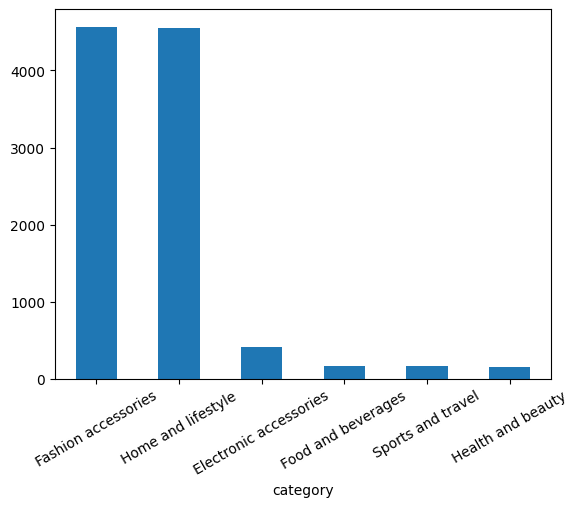

In [144]:
df['category'].value_counts().plot(kind='bar',rot=30)

<Axes: xlabel='payment_method'>

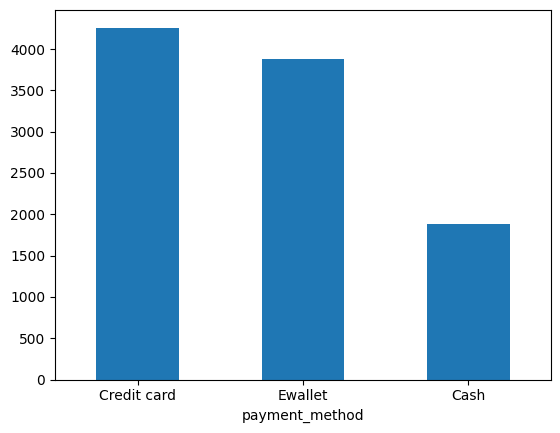

In [145]:
df['payment_method'].value_counts().plot(kind='bar',rot=0)

## Data Transformation

In [146]:
df.drop(columns=['invoice_id','date','time','day','month'],inplace=True)
df.sample(3)

,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_price
5058,WALM095,Big Spring,Home and lifestyle,25.0,3.0,Credit card,6.0,0.33,75.0
3760,WALM058,Port Arthur,Home and lifestyle,78.0,1.0,Ewallet,4.0,0.33,78.0
8951,WALM075,San Marcos,Fashion accessories,82.0,3.0,Cash,5.0,0.33,246.0


In [147]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Columns to encode
categorical_columns = ['Branch', 'City', 'category', 'payment_method']

# Apply label encoding
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [148]:
df.sample(10)

,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_price
6977,28,80,1,61.00,3.0,1,5.0,0.48,183.00
1986,97,64,4,52.00,1.0,2,8.0,0.18,52.00
436,8,75,5,82.93,4.0,2,9.6,0.48,331.72
6356,68,78,0,36.00,3.0,1,5.0,0.33,108.00
8805,2,83,1,71.00,3.0,0,6.0,0.48,213.00
6494,28,80,4,55.00,2.0,1,6.0,0.48,110.00
880,22,63,2,33.21,10.0,2,6.0,0.48,332.10
7872,83,85,4,64.00,3.0,1,7.0,0.33,192.00
9829,45,90,1,35.00,2.0,0,4.0,0.48,70.00
1471,94,10,1,68.00,2.0,2,4.0,0.33,136.00


## Customer Satisfaction Prediction (Classification Problem)

- **I tried solving it using Regression but the results were not satisfactory (R2 Score = 0.4-0.5). So, I thought of convert the Ratings (Numerical) (3.0-10.0 in our data) to Categorical Bins (3.0-7.0 = Low-Mid; 7.0-10.0-High). This proved to be more beneficial as the accuracy was satisfactory (around 80%).**

In [320]:
df1 = df.copy()

In [321]:
df1.head()

,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_price
0,2,83,3,74.69,7.0,2,9.1,0.48,522.83
1,47,42,0,15.28,5.0,0,9.6,0.48,76.40
2,66,41,4,46.33,7.0,1,7.4,0.33,324.31
3,63,9,3,58.22,8.0,2,8.4,0.33,465.76
4,12,46,5,86.31,7.0,2,5.3,0.48,604.17


### Binning will help us in separating Low-Mid rating products with High-Rating products, which can help the business owners to focus more on the High-Rating products

In [302]:
bins = [3.0, 7.0, 10.0]  # Bin edges
labels = [0, 1]  # Corresponding bin labels

# Apply binning
df1['rating'] = pd.cut(df1['rating'], bins=bins, labels=labels, include_lowest=True)

# Check the result
df1['rating'].value_counts()

rating
0    8161
1    1859
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

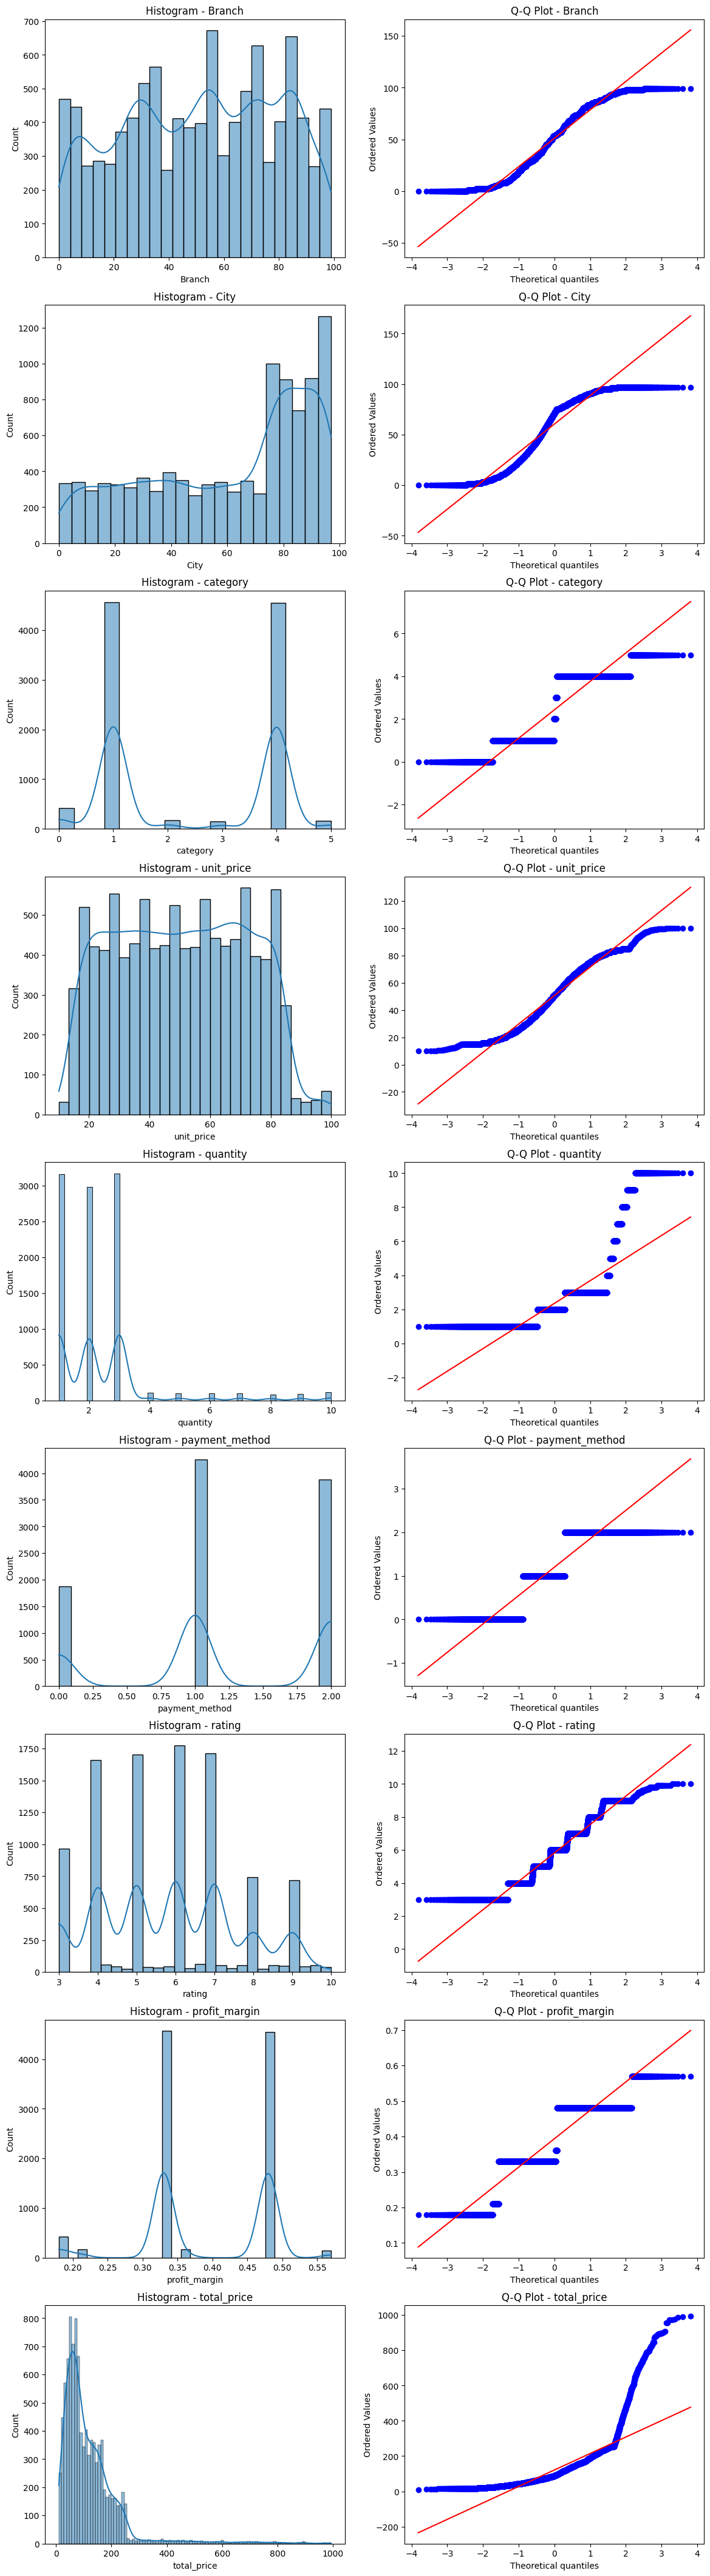

In [230]:
from scipy.stats import norm, probplot

features = df1.columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(14, 6 * len(features)))

for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {feature}')

    # Probability plot (Q-Q plot)
    probplot(df[feature], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].set_title(f'Q-Q Plot - {feature}')

plt.show()

In [155]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import  log_loss
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import ELU
from keras.activations import elu

In [303]:
X = df1.drop(columns=['rating'])
y = df1['rating']

X.head()

,Branch,City,category,unit_price,quantity,payment_method,profit_margin,total_price
0,2,83,3,74.69,7.0,2,0.48,522.83
1,47,42,0,15.28,5.0,0,0.48,76.40
2,66,41,4,46.33,7.0,1,0.33,324.31
3,63,9,3,58.22,8.0,2,0.33,465.76
4,12,46,5,86.31,7.0,2,0.48,604.17


In [304]:
y

0        1
1        1
2        1
3        1
4        0
        ..
10046    0
10047    0
10048    0
10049    0
10050    0
Name: rating, Length: 10020, dtype: category
Categories (2, int64): [0 < 1]

In [305]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(3)

,Branch,City,category,unit_price,quantity,payment_method,profit_margin,total_price
17,60,17,5,72.61,6.0,1,0.33,435.66
1770,36,53,4,38.00,2.0,2,0.48,76.00
1888,39,28,4,21.00,2.0,2,0.48,42.00


In [306]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [307]:
print(X_train_s.shape)
print(y_train.shape)

print(X_test_s.shape)
print(y_test.shape)

(8016, 8)
(8016,)
(2004, 8)
(2004,)


In [308]:
xgb = XGBClassifier()
xgb.fit(X_train_s, y_train)

# Evaluate the model on the test set
y_pred_xg = xgb.predict(X_test_s)  # Predict using the test set
acc_xg = accuracy_score(y_test, y_pred_xg)  # Compare predictions with the test set labels
print("Final Accuracy:", acc_xg)

Final Accuracy: 0.7829341317365269


In [309]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_s, y_train)

# Evaluate the final model
y_pred_lg = lgbm.predict(X_test_s)
acc_lg = accuracy_score(y_test, y_pred_lg)
print("Final Accuracy:", acc_lg)

[LightGBM] [Info] Number of positive: 1470, number of negative: 6546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 8016, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183383 -> initscore=-1.493592
[LightGBM] [Info] Start training from score -1.493592
Final Accuracy: 0.7964071856287425


In [310]:
rf = RandomForestClassifier()
rf.fit(X_train_s, y_train)

# Evaluate the final model
y_pred_rf = rf.predict(X_test_s)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Final Accuracy:", acc_rf)

Final Accuracy: 0.7724550898203593


In [311]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('RF',rf),
    ('XGB',xgb),
    ('LGBM',lgbm)
]

vote_model = VotingClassifier(estimators=estimators)
vote_model.fit(X_train_s,y_train)

[LightGBM] [Info] Number of positive: 1470, number of negative: 6546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 739
[LightGBM] [Info] Number of data points in the train set: 8016, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183383 -> initscore=-1.493592
[LightGBM] [Info] Start training from score -1.493592


VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('LGBM', LGBMClassifier())])

In [312]:
y_pred_v = vote_model.predict(X_test_s)
acc_v = accuracy_score(y_test, y_pred_v)
print("Final Accuracy:", acc_v)

Final Accuracy: 0.7909181636726547


In [313]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=8))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(2,activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,170 (47.54 KB)

 Trainable params: 12,170 (47.54 KB)

 Non-trainable params: 0 (0.00 B)

In [314]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train is a categorical target with labels 0, 1
y_train = to_categorical(y_train, num_classes=2)  # Adjust num_classes based on your target classes
y_test = to_categorical(y_test, num_classes=2)    # If needed for evaluation

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train_s, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8266 - loss: 0.4635 - val_accuracy: 0.8067 - val_loss: 0.4056
Epoch 2/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8201 - loss: 0.3791 - val_accuracy: 0.8067 - val_loss: 0.3937
Epoch 3/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8162 - loss: 0.3730 - val_accuracy: 0.8067 - val_loss: 0.3907
Epoch 4/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8196 - loss: 0.3763 - val_accuracy: 0.8067 - val_loss: 0.3860
Epoch 5/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.3737 - val_accuracy: 0.8067 - val_loss: 0.3897
Epoch 6/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8142 - loss: 0.3680 - val_accuracy: 0.8067 - val_loss: 0.3867
Epoch 7/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.3733 - val_accuracy: 0.8067 - val_loss: 0.3868
Epoch 8/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.3598 - val_accuracy: 0.

In [315]:
y_test_labels = y_test.argmax(axis=1)

# Make predictions
y_prob = model.predict(X_test_s)
y_pred = y_prob.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7984031936127745


## Creating a Unified Pipeline for Model Prediction
-  **Implement all preprocessing, model training, and prediction steps in a single pipeline for efficient and consistent handling of data transformations and predictions. This ensures seamless model evaluation, prediction and deployment.**






In [330]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Assuming df1 is your dataset and target column is 'rating'
df1 = df.copy()
df1.dropna(inplace=True)

# Step 1: Preprocessing
# Binning the 'rating' column (as per your provided code)
bins = [3.0, 7.0, 10.0]  # Bin edges
labels = [0, 1]  # Bin labels
df1['rating'] = pd.cut(df1['rating'], bins=bins, labels=labels, include_lowest=True)

# Define the features (X) and target (y)
X = df1.drop(columns=['rating'])  # Features (excluding 'rating')
y = df1['rating']  # Target (rating)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the numerical and categorical columns
numerical_cols = ['unit_price', 'quantity', 'profit_margin', 'total_price']
categorical_cols = ['Branch', 'City', 'category', 'payment_method']

# Step 3: Preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_cols),
        ('cat', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ])

# Step 4: Build the classification pipeline with LGBMClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier())  # LGBM classifier for classification
])

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the final accuracy
print("Final Accuracy:", accuracy)


[LightGBM] [Info] Number of positive: 1470, number of negative: 6546
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 8016, number of used features: 211
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183383 -> initscore=-1.493592
[LightGBM] [Info] Start training from score -1.493592
Final Accuracy: 0.7959081836327345


### Testing Our Model
	Branch	City	category	unit_price	quantity	payment_method	   rating	   profit_margin
	WALM048	Harlingen Electronic accessories $15.28	5.0		   Cash	             9.6	   0.48
- **Rating: 9.6 (High)**
- **Model Prediction: 1 (High)**

In [331]:
new_data = pd.DataFrame({
    'Branch': ['WALM048'],
    'City': ['Harlingen'],
    'category': ['Electronic accessories'],
    'unit_price': [15.28],
    'quantity': [5.0],
    'payment_method': ['Cash'],
    'profit_margin': [0.48],
    'total_price': [76.4]
})

# Step 1: Use the pipeline to make predictions
predictions = pipeline.predict(new_data)

# Step 2: Print the predictions
print(predictions)

# Optionally, map the predictions back to their original rating values (0 = 3.0-7.0, 1 = 7.0-10.0)
rating_map = {0: 'Low Rating (3.0-7.0)', 1: 'High Rating (7.0-10.0)'}
predicted_ratings = [rating_map[pred] for pred in predictions]

print("Predicted Ratings:", predicted_ratings)

[1]
Predicted Ratings: ['High Rating (7.0-10.0)']


	Branch	City	category	unit_price	quantity	payment_method	   rating	   profit_margin
	WALM003	San Antonio Health and beauty $74.69	3.0		   Ewallet	             9.1	   0.48
- **Rating: 9.1 (High)**
- **Model Prediction: 0 (Low-Mid)**

In [332]:
new_data = pd.DataFrame({
    'Branch': ['WALM003'],
    'City': ['San Antonio'],
    'category': ['Health and beauty'],
    'unit_price': [74.69],
    'quantity': [3.0],
    'payment_method': ['Ewallet'],
    'profit_margin': [0.48],
    'total_price': [224.07]
})

# Step 1: Use the pipeline to make predictions
predictions = pipeline.predict(new_data)

# Step 2: Print the predictions
print(predictions)

# Optionally, map the predictions back to their original rating values (0 = 3.0-7.0, 1 = 7.0-10.0)
rating_map = {0: 'Low-Mid Rating (3.0-7.0)', 1: 'High Rating (7.0-10.0)'}
predicted_ratings = [rating_map[pred] for pred in predictions]

print("Predicted Ratings:", predicted_ratings)

[0]
Predicted Ratings: ['Low-Mid Rating (3.0-7.0)']


### So, with respect to 80% accuracy, it is working fine. It can be improved through some feature engineering and hyperparameter tuning.